# Lab 5
This is the jupyter notebook for lab 5b. First we will import some libraries and functions. 

In [1]:
import numpy as np
from netCDF4 import MFDataset 
from netCDF4 import Dataset 
import matplotlib
matplotlib.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from netCDF4 import num2date
from netCDF4 import date2index
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from metpy.units import units
import xarray as xr
import cartopy.util as cutil
%matplotlib inline

Our next setep is to read in the netCDF files. 

In [2]:
ds = xr.open_dataset('https://psl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc')
ds2 = xr.open_dataset('https://psl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/slp.mon.mean.nc')
ds3 = xr.open_dataset('https://psl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/uwnd.mon.mean.nc')
ds4 = xr.open_dataset('https://psl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/vwnd.mon.mean.nc')


Indicate the desired years and month!

In [3]:
month = 1
monthlabel = 'January'

# Enter the years!
year1 = 1983
year2 = 1998
year3 = 2016
year4 = 1958
year5 = 1966
year6 = 1973
year7 = 1988
year8 = 1992

#Don't change these! Needed for Python to select correct times
ty1 = int(year1) - 1948
ty2 = int(year2) - 1948
ty3 = int(year3) - 1948
ty4 = int(year4) - 1948
ty5 = int(year5) - 1948
ty6 = int(year6) - 1948
ty7 = int(year7) - 1948
ty8 = int(year8) - 1948
tm = int(month)-1

Now we extract the data desired!

In [4]:
# Grab lat/lon values
lats = ds.lat.data
lons = ds.lon.data

#subtract 1 from tm because the first observation in Python is observation 0

temp = ds.air[tm::12,:,:]
slp = ds2.slp[tm::12,:,:]
u_barbs = ds3.uwnd.values[:][tm::12,:,:] * units('m/s')
v_barbs = ds4.vwnd.values[:][tm::12,:,:] * units('m/s')
uwnd = np.asarray(ds3.uwnd.values[:][tm::12,:,:] * units('m/s'))
vwnd = np.asarray(ds4.vwnd.values[:][tm::12,:,:] * units('m/s'))

Print the numpy shapes of the temperature, latitude and longtitude. This can be important when debugging.

In [5]:
print (np.shape(slp))
print (np.shape(lats))
print (np.shape(lons))

(73, 73, 144)
(73,)
(144,)


Select the countour settings for the height anomalies (in m). The format is (minimum, maximum, interval) 

In [6]:
clevs_slp_anom = np.arange(-16, 16.1, 1)
clevs_slp = np.arange(0, 1080, 4)
clevs_stdanom = np.arange(-3,3.1,0.25)

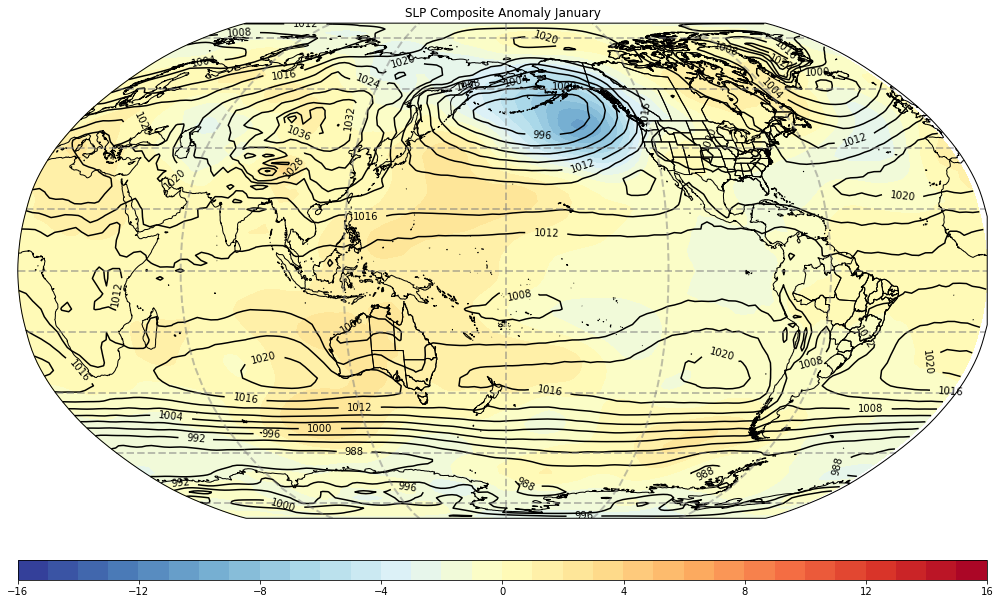

In [7]:
# Set up the projection that will be used for plotting
mapcrs = ccrs.Robinson(central_longitude=180)

# Set up the projection of the data; if lat/lon then PlateCarree is what you want
datacrs = ccrs.PlateCarree()

# Start the figure and create plot axes with proper projection
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=mapcrs)

#not needed here, but used for sub-setting domain to plot
#ax.set_extent([-130, -72, 20, 55], ccrs.PlateCarree())

# Add geopolitical boundaries for map reference
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
gl = ax.gridlines(color='gray',linewidth=2, alpha = 0.5, linestyle='--')

# labels gridlines for PlateCarree ccrs option (doesn't work with Robinson, etc.)
#gl.xlabels_top = False
#gl.ylabels_right = False

#color-filled contour time!
#plotting temperature and including color bar
cf = ax.contourf(lons, lats, (slp[ty1,:,:] + slp[ty2,:,:] + slp[ty3,:,:] + slp[ty4,:,:] + slp[ty5,:,:] 
                 + slp[ty6,:,:] + slp[ty7,:,:] + slp[ty8,:,:])/8- np.mean(slp[:,:,:],axis=0), clevs_slp_anom, cmap=plt.cm.RdYlBu_r, transform=datacrs)
plt.colorbar(cf, orientation='horizontal', pad=0.05, aspect=50)

# Plot 500-hPa Geopotential Height Anomaly in meters
#cs = ax.contour(lons, lats, hght[ty,:,:] - np.mean(hght[:,:,:],axis=0), clevs_hght_anom, colors='black', transform=datacrs)
#plt.clabel(cs, fmt='%d')

# Plot 500-hPa Geopotential Heights in meters
cs = ax.contour(lons, lats, (slp[ty1,:,:] + slp[ty2,:,:] + slp[ty3,:,:] + slp[ty4,:,:] + slp[ty5,:,:] 
                 + slp[ty6,:,:] + slp[ty7,:,:] + slp[ty8,:,:])/8, clevs_slp, colors='black', transform=datacrs)
plt.clabel(cs, fmt='%d')

# Plot 500-hPa wind barbs in knots, regrid to reduce number of barbs
#ax.barbs(lons[::4], lats[::4], uwnd.to('kt')[ty,::4,::4].m, 
#         vwnd.to('kt')[ty,::4,::4].m, pivot='middle',
#         color='black', transform=datacrs, length=5, linewidth=0.4)

# Make some nice titles for the plot (one right, one left)
plt.title('SLP Composite Anomaly' + ' ' + str(monthlabel))

# Reduce excessive white space around image and show
plt.tight_layout()
plt.savefig('SLPCompositeAnomaly' + str(monthlabel) + str(year1) +str(year2)+str(year3)+str(year4)+str(year5)+str(year6)
            +str(year7)+str(year8), dpi=150)
plt.show()

For comparison, a map of standardized anomalies

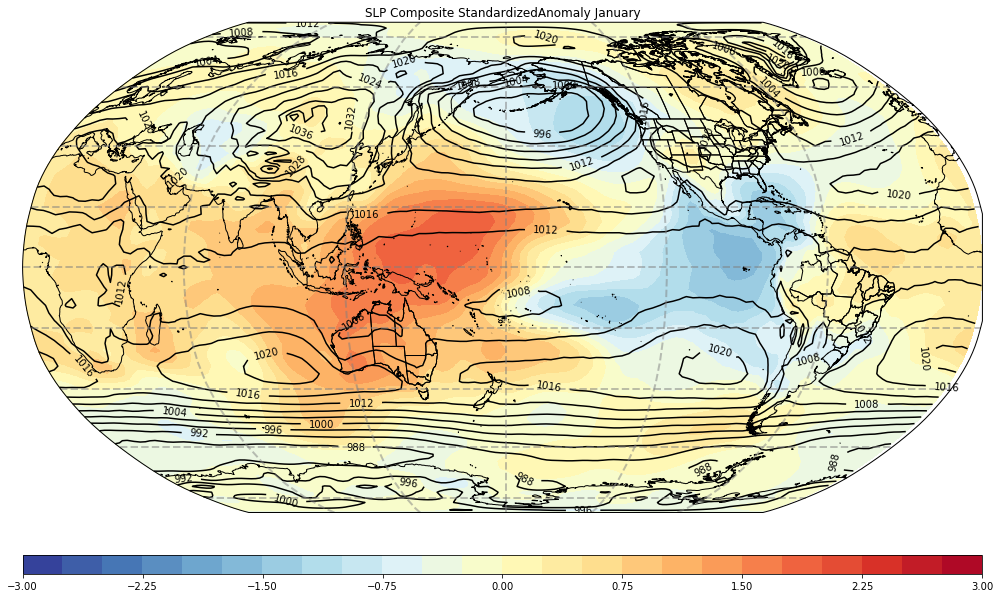

In [8]:
# Set up the projection that will be used for plotting
mapcrs = ccrs.Robinson(central_longitude=180)

# Set up the projection of the data; if lat/lon then PlateCarree is what you want
datacrs = ccrs.PlateCarree()

# Start the figure and create plot axes with proper projection
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=mapcrs)

#not needed here, but used for sub-setting domain to plot
#ax.set_extent([-130, -72, 20, 55], ccrs.PlateCarree())

# Add geopolitical boundaries for map reference
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
gl = ax.gridlines(color='gray',linewidth=2, alpha = 0.5, linestyle='--')

# labels gridlines for PlateCarree ccrs option (doesn't work with Robinson, etc.)
#gl.xlabels_top = False
#gl.ylabels_right = False

#color-filled contour time!
#plotting temperature and including color bar
cf = ax.contourf(lons, lats, ((slp[ty1,:,:] + slp[ty2,:,:] + slp[ty3,:,:] + slp[ty4,:,:] + slp[ty5,:,:] 
                 + slp[ty6,:,:] + slp[ty7,:,:] + slp[ty8,:,:])/8- np.mean(slp[:,:,:],axis=0))/np.std(slp[:,:,:],axis=0), clevs_stdanom, cmap=plt.cm.RdYlBu_r, transform=datacrs)
plt.colorbar(cf, orientation='horizontal', pad=0.05, aspect=50)

# Plot 500-hPa Geopotential Height Anomaly in meters
#cs = ax.contour(lons, lats, hght[ty,:,:] - np.mean(hght[:,:,:],axis=0), clevs_hght_anom, colors='black', transform=datacrs)
#plt.clabel(cs, fmt='%d')

# Plot 500-hPa Geopotential Heights in meters
cs = ax.contour(lons, lats, (slp[ty1,:,:] + slp[ty2,:,:] + slp[ty3,:,:] + slp[ty4,:,:] + slp[ty5,:,:] 
                 + slp[ty6,:,:] + slp[ty7,:,:] + slp[ty8,:,:])/8, clevs_slp, colors='black', transform=datacrs)
plt.clabel(cs, fmt='%d')

# Plot 500-hPa wind barbs in knots, regrid to reduce number of barbs
#ax.barbs(lons[::4], lats[::4], uwnd.to('kt')[ty,::4,::4].m, 
#         vwnd.to('kt')[ty,::4,::4].m, pivot='middle',
#         color='black', transform=datacrs, length=5, linewidth=0.4)

# Make some nice titles for the plot (one right, one left)
plt.title('SLP Composite StandardizedAnomaly' + ' ' + str(monthlabel))

# Reduce excessive white space around image and show
plt.tight_layout()
plt.savefig('500hPaZCompositestandardizedAnomaly' + str(monthlabel) + str(year1) +str(year2)+str(year3)+str(year4)+str(year5)+str(year6)
            +str(year7)+str(year8), dpi=150)
plt.show()